1.
(a) Classification Decision Tree is a machine learning algorithm used to address classification prolems, where the objective is to assign data into predefined catagories or lables, this type of problem deals with discrete outputs, rather than continuous outputs, which are focus of regression problems. examples of applications: fraud detection, medical diagnosis, loan approval.
(b) Classification Decision Tree make predictions:
1)Start at the root: begin withthe first question(e.g."is age > 18?")
2)Follow the Branches: Based on the answe, move down a branch to another qustion(e.g., "is income > 50k?")
3)Reach a leaf: at the end of the path, a "leaf gives" the final decision (e.g., "approved" or "denied").
Multiple Linear regression make predictions:
Use formula: y = beta0 + beta1* x1+ beta2 * x2 + ....
predicts a continuous number (e.g. house price, temperature) by calculating a weighted sum of inputs.
Key Difference
Classification Tree	             | Multiple Linear Regression
Predicts categories (e.g., "Yes"/"No").|Predicts numbers (e.g., "Price = $200k").
Makes step-by-step decisions.	     | Uses a single formula.

2.
Scenario: evaluating a medical diagnostic model for detecting a disease. Here's the confusion matrix after testing the model on 100 patients
(TP): have a disease and get confirmed with the disease: 40
(TN): don't have disease and get confirmed don't have disease: 45
(FP): have a diaseas but get confirmed don't have disease: 5
(FN): don't have disease but get confirmed with the disease: 10
Accuracy

Formula: (TP + TN) / (TP + TN + FP + FN)
Calculation: (40 + 45) / (40 + 45 + 5 + 10) = 85 / 100 = 0.85 (85%)
Interpretation: The model is correct 85% of the time.
Sensitivity (Recall for Positives)

Formula: TP / (TP + FN)
Calculation: 40 / (40 + 10) = 40 / 50 = 0.8 (80%)
Interpretation: The model correctly identifies 80% of the patients with the disease.
Specificity

Formula: TN / (TN + FP)
Calculation: 45 / (45 + 5) = 45 / 50 = 0.9 (90%)
Interpretation: The model correctly identifies 90% of the patients without the disease.
Precision

Formula: TP / (TP + FP)
Calculation: 40 / (40 + 5) = 40 / 45 ≈ 0.89 (88.9%)
Interpretation: When the model predicts "Disease," it is correct 88.9% of the time.

Accuracy tells the percentage of correct predictions out of all predictions. Good for balanced datasets where false positives and false negatives are equally important.
Sensitivity tells how well the model identifies actual positives. Critical in scenarios like disease detection where missing positive cases (FN) is costly.
Specificity tells how well the model identifies actual negatives. Important in cases like drug screening where false alarms (FP) should be minimized.
Precision Measures the accuracy of positive predictions. Useful in scenarios like spam detection, where you want flagged items to be mostly correct (few FP).

3.

In [11]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above
# Remove specified columns
ab_reduced_noNaN = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)

# Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Set data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Exploratory Data Analysis (EDA)

# Display information about the dataset
ab_reduced_noNaN.info()

# Summary statistics for numerical columns
print(ab_reduced_noNaN.describe())

# Value counts for the categorical column
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510    10.646133    0.365261
min     

4.
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
Converts the Hard_or_Paper column into a binary (numerical) format.
It creates dummy variables for each category in Hard_or_Paper:
H (Hardcover) becomes 1.
P (Paperback) becomes 0.
The result (y) is the target variable for training the model, which the model tries to predict.
X = ab_reduced_noNaN[['List Price']]
Selects the column List Price from the dataset as the feature (input variable) to train the model.
The result (X) is the input data the model uses to learn patterns and make predictions.

Number of observations in the training set: 255
Number of observations in the testing set: 64


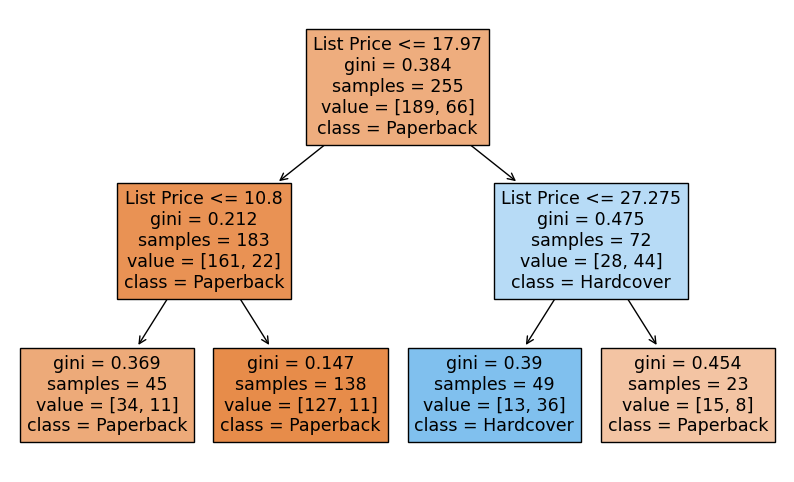

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocessing as per previous steps
ab_reduced_noNaN = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)
ab_reduced_noNaN = ab_reduced_noNaN.dropna()
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Define target variable y and feature variable X
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Create an 80/20 train-test split with a random seed for reproducibility
ab_reduced_noNaN_train, ab_reduced_noNaN_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Report the number of observations in the training and testing sets
print(f"Number of observations in the training set: {ab_reduced_noNaN_train.shape[0]}")
print(f"Number of observations in the testing set: {ab_reduced_noNaN_test.shape[0]}")

# Initialize and train the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(ab_reduced_noNaN_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10,6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()



Summary from Questions 1 to 4
Question 1: Understanding Classification Decision Trees
Purpose: Introduces the concept of a classification problem and decision trees.
Key Learnings:
Classification problems predict categories (e.g., "Spam" vs. "Not Spam").
A decision tree makes predictions by splitting data step-by-step based on feature values (e.g., "Is List Price > $20?").
Decision trees are rule-based and interpretable.
Question 2: Evaluation Metrics
Purpose: Explores how to evaluate classification models using metrics.
Key Learnings:
Metrics like Accuracy, Sensitivity, Specificity, and Precision each measure a different aspect of model performance.
Use the right metric depending on the goal:
Sensitivity: Focus on catching all positives (e.g., detecting diseases).
Specificity: Avoid false alarms (e.g., anti-doping tests).
Precision: Ensure positive predictions are correct (e.g., spam detection).
Accuracy: Overall correctness when all errors are equally important.
Question 3: Data Preparation
Purpose: Emphasizes data cleaning and formatting to make it usable for machine learning.
Key Learnings:
Remove irrelevant columns (e.g., dimensions of books).
Handle missing values (drop rows with NaN).
Convert data types for machine learning compatibility (e.g., numeric or categorical).
Clean, well-prepared data is critical for accurate and meaningful results.
Question 4: Training a Decision Tree Classifier
Purpose: Demonstrates how to train and evaluate a classification model using a DecisionTreeClassifier.
Key Learnings:
Split Data: Divide into training (80%) and testing (20%) sets to avoid overfitting.
Feature Selection: Use List Price as the input (X) and Hard_or_Paper as the target (y).
Model Training: Fit a decision tree with a max_depth of 2 for simplicity.
Evaluation: Use accuracy and confusion matrices to measure performance.
Visualization: plot_tree() helps interpret the decision-making process.
chatgpt link: https://chatgpt.com/share/673cd681-f28c-8012-87f4-e607dad3e52c

5.
Start at the Top (Root) of the Tree:

The tree begins by asking a question about one of the book's features, such as "Is the List Price less than or equal to $15?"
Answer the Question:

Yes: If the answer is yes, move to the left side of the tree.
No: If the answer is no, move to the right side of the tree.
Continue Asking Questions:

At each new point (node) in the tree, the classifier asks another question about a different feature, like "Does the book have 250 pages or fewer?" or "Is the book thickness less than or equal to 1.5 cm?"
Reach a Decision (Leaf Node):

After a series of questions, you reach the end of the path where the tree makes a final decision. This decision will classify the book as either "Hardcover" or "Paperback."
Example Scenario:

Book Details:

NumPages: 300
Thick: 1.2 cm
List Price: $20
Decision Path:

List Price ≤ $15? No → Move to the right.
NumPages ≤ 250? No → Move to the right.
Thick ≤ 1.5 cm? Yes → Predict "Hardcover."

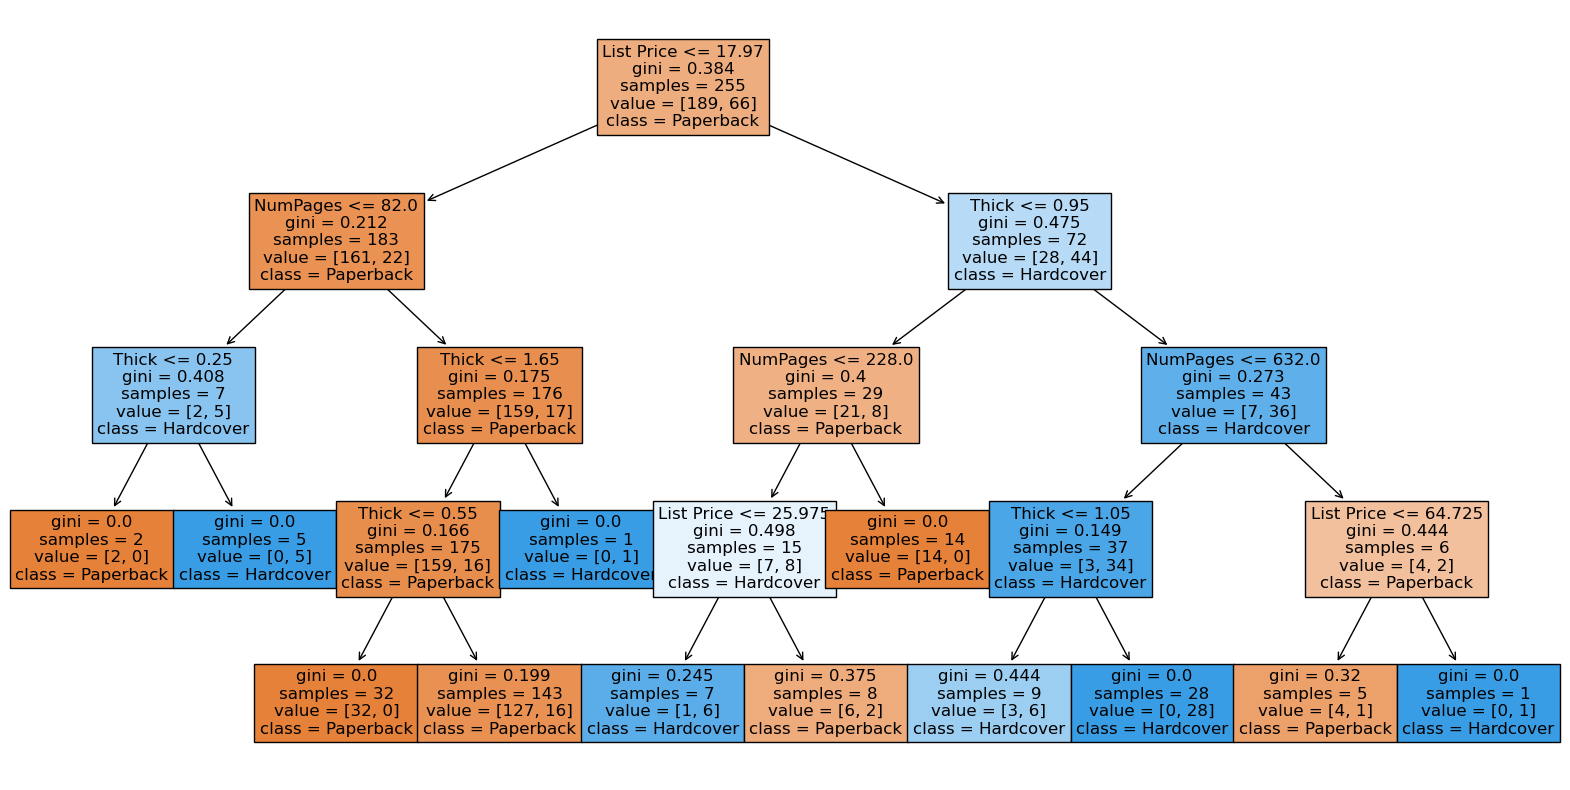

Accuracy of clf2: 0.86


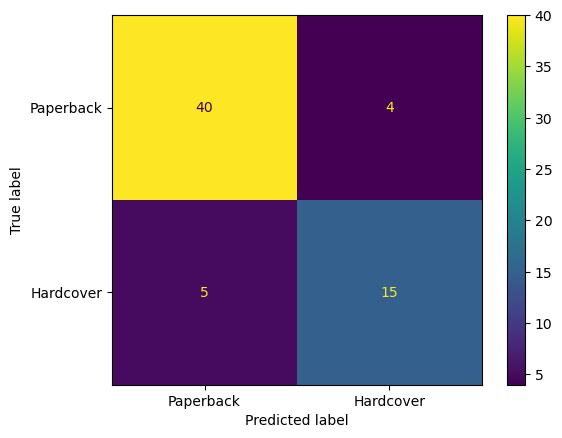

Feature Importances:
NumPages      0.216537
Thick         0.297490
List Price    0.485974
dtype: float64


In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocessing as per previous steps
ab_reduced_noNaN = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)
ab_reduced_noNaN = ab_reduced_noNaN.dropna()
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Define target variable y
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Define feature variables X for clf2
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Create an 80/20 train-test split with a random seed for reproducibility
ab_reduced_noNaN_train, ab_reduced_noNaN_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(ab_reduced_noNaN_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], filled=True, fontsize=12)
plt.show()

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = clf2.predict(ab_reduced_noNaN_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of clf2: {accuracy:.2f}")

# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paperback', 'Hardcover'])
disp.plot()
plt.show()

feature_importances = pd.Series(clf2.feature_importances_, index=['NumPages', 'Thick', 'List Price'])
print("Feature Importances:")
print(feature_importances)


6.

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocessing as per previous steps
ab_reduced_noNaN = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)
ab_reduced_noNaN = ab_reduced_noNaN.dropna()
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Define target variable y and feature variables for clf and clf2
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 'H' for Hardcover
X_clf = ab_reduced_noNaN[['List Price']]
X_clf2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Create an 80/20 train-test split with a random seed for reproducibility
X_train_clf, X_test_clf, y_train, y_test = train_test_split(
    X_clf, y, test_size=0.2, random_state=42
)

X_train_clf2, X_test_clf2, _, _ = train_test_split(
    X_clf2, y, test_size=0.2, random_state=42
)

# Initialize and train the DecisionTreeClassifier with max_depth=2 for clf
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train_clf, y_train)

# Initialize and train the DecisionTreeClassifier with max_depth=4 for clf2
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_clf2, y_train)

# Predict on the test set using clf and clf2
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Function to compute confusion matrix metrics
def compute_metrics(y_true, y_pred, positive_label='H'):
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])  # Assuming 'H' = 1, 'P' = 0
    TN, FP, FN, TP = cm.ravel()
    
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    
    return {
        'Confusion Matrix': cm,
        'Sensitivity': np.round(sensitivity, 3),
        'Specificity': np.round(specificity, 3),
        'Accuracy': np.round(accuracy, 3)
    }

# Compute metrics for clf
metrics_clf = compute_metrics(y_test, y_pred_clf)

# Compute metrics for clf2
metrics_clf2 = compute_metrics(y_test, y_pred_clf2)

# Display the results
print("=== Decision Tree Classifier (clf) Metrics ===")
print("Confusion Matrix:")
print(metrics_clf['Confusion Matrix'])
print(f"Sensitivity (Recall): {metrics_clf['Sensitivity']}")
print(f"Specificity: {metrics_clf['Specificity']}")
print(f"Accuracy: {metrics_clf['Accuracy']}\n")

print("=== Decision Tree Classifier (clf2) Metrics ===")
print("Confusion Matrix:")
print(metrics_clf2['Confusion Matrix'])
print(f"Sensitivity (Recall): {metrics_clf2['Sensitivity']}")
print(f"Specificity: {metrics_clf2['Specificity']}")
print(f"Accuracy: {metrics_clf2['Accuracy']}")


=== Decision Tree Classifier (clf) Metrics ===
Confusion Matrix:
[[14  6]
 [ 4 40]]
Sensitivity (Recall): 0.909
Specificity: 0.7
Accuracy: 0.844

=== Decision Tree Classifier (clf2) Metrics ===
Confusion Matrix:
[[15  5]
 [ 4 40]]
Sensitivity (Recall): 0.909
Specificity: 0.75
Accuracy: 0.859


7.
The differences between the two confusion matrices are because one model uses only the List Price to make predictions, while the other uses NumPages, Thick, and List Price. The model with more features has more information to accurately classify books as Hardcover or Paperback. This additional information helps reduce mistakes, leading to higher sensitivity, specificity, and overall accuracy. Therefore, the confusion matrices for clf and clf2 are better because they correctly identify more true positives and true negatives.

8.
Interpret the Plot: After running the code, examine the bar chart to see the relative importance of each feature (NumPages, Thick, List Price). The taller the bar, the more important the feature is in making predictions.

Report the Most Important Feature: The printed statement will indicate which predictor variable has the highest importance according to clf2. This helps in understanding which feature contributes the most to the model's decision-making process.

9.
In linear regression, coefficients indicate the exact change in the target variable for a one-unit increase in each predictor, showing the direction and magnitude of each feature's effect. In contrast, decision tree feature importances reflect the relative contribution of each feature to the model's decision-making process, without specifying the exact change. Therefore, while regression coefficients provide specific quantitative relationships, feature importances offer a general sense of which features are most influential in making predictions.